# COMPETITION
"Invistico_Airline" dataset shows whether a customer is satisfied with the airlines or not after travelling with them. There are several other measurementS or feedbackS taken from the customers as well as their demographic data is also recorded.The company wants you to develop an algorithm to classify the flight experience of a customer as 'Satisfied' or 'Dissatisfied'

# 1.Data Collection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Invistico_Airline.csv')

In [3]:
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


# 2.Pre-processing

In [12]:
#Checking for Null values 

In [13]:
data.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [15]:
#filling in the missing values

In [16]:
data['Arrival Delay in Minutes']=data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median())

In [17]:
data.isna().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [18]:
#checking for outliers in some of the columns

Text(0.5, 1.0, 'Box plot of Food and drink')

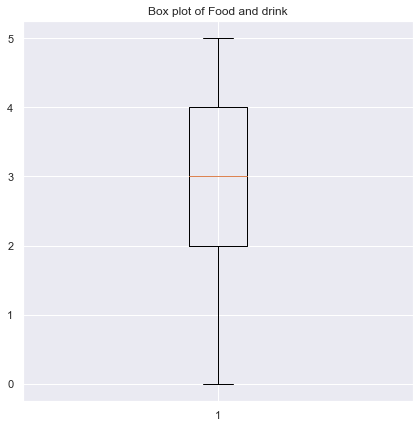

In [19]:
plt.boxplot(data['Food and drink'])
plt.title('Box plot of Food and drink')

Text(0.5, 1.0, 'Box plot of Inflight wifi service')

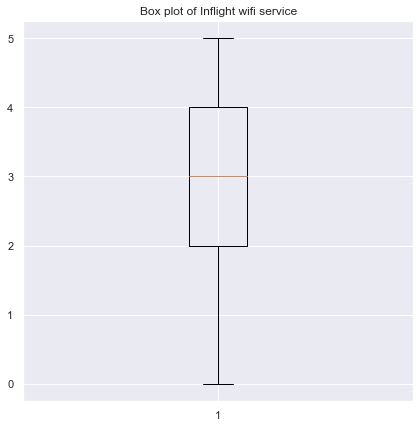

In [20]:
plt.boxplot(data['Inflight wifi service'])
plt.title('Box plot of Inflight wifi service')

Text(0.5, 1.0, 'Box plot of Leg room service')

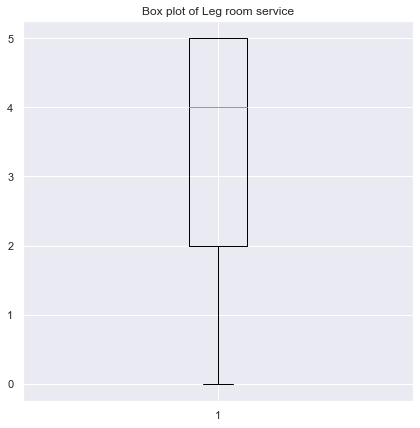

In [21]:
plt.boxplot(data['Leg room service'])
plt.title('Box plot of Leg room service')

Text(0.5, 1.0, 'Box plot of Cleanliness')

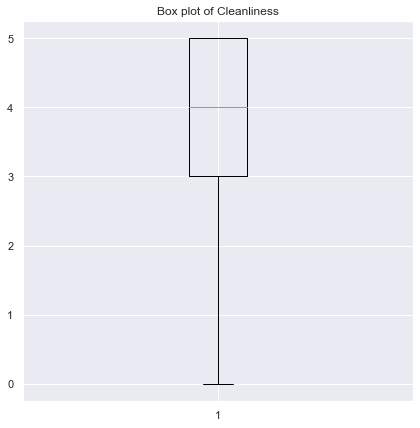

In [22]:
plt.boxplot(data['Cleanliness'])
plt.title('Box plot of Cleanliness')

Text(0.5, 1.0, 'Box plot of Online support')

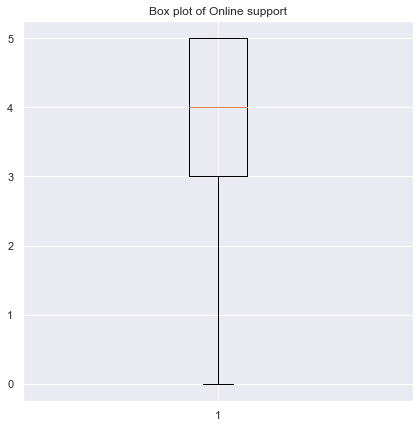

In [23]:
plt.boxplot(data['Online support'])
plt.title('Box plot of Online support')

In [24]:
#Encoding

In our dataset, some of our columns have numeric values and some of them have categorical values. We have to apply data preprocessing methods to prepare this data for our logistic regression algorithm. But to do this, we need to learn the data type of all of our columns. Let's create 2 methods for this and run them to see the outputs of these methods.

In [25]:
def object_cols(df):
    return list(df.select_dtypes(include='object').columns)

def numerical_cols(df):
    return list(df.select_dtypes(exclude='object').columns)

In [26]:
obj_col = object_cols(data)
num_col = numerical_cols(data)

In [27]:
obj_col

['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class']

In [28]:
num_col

['Age',
 'Flight Distance',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [29]:
data.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

Now we have two different lists. One of them has the names of categorical columns. The name of this list is obj_col. To work with categorical variables we need to encode them. To encode categorical values let's call the LabelEncoder method of sklearn. The second list which is num_col has the names of columns that include numerical values. We can normalize these values by using Normalize method of sklearn. Once we apply these two preprocessing methods to our data, we will be ready for Logistic Regression.

In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [31]:
#Normalizing

In [32]:
le = LabelEncoder()
norm = Normalizer()

In [33]:
for col in obj_col:
    data[col] = le.fit_transform(data[col])

In [34]:
data[num_col] = norm.fit_transform(data[num_col])

In [35]:
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,0,0.238073,1,1,0.970605,0.0,0.0,0.0,...,0.007325,0.010988,0.010988,0.000000,0.010988,0.018313,0.010988,0.007325,0.000000,0.000000
1,1,1,0,0.018781,1,0,0.984599,0.0,0.0,0.0,...,0.000799,0.001199,0.001598,0.001598,0.001598,0.000799,0.001199,0.000799,0.123874,0.121876
2,1,0,0,0.007016,1,1,0.999965,0.0,0.0,0.0,...,0.000935,0.000935,0.001403,0.001403,0.001871,0.001871,0.001871,0.000935,0.000000,0.000000
3,1,0,0,0.095856,1,1,0.995303,0.0,0.0,0.0,...,0.004793,0.001598,0.001598,0.000000,0.001598,0.006390,0.001598,0.004793,0.000000,0.000000
4,1,0,0,0.193904,1,1,0.980602,0.0,0.0,0.0,...,0.011080,0.005540,0.005540,0.000000,0.005540,0.011080,0.005540,0.013850,0.000000,0.000000


# 3.Exploratory data analysis

Univariate data visualization plots help us comprehend the enumerative properties as well as a descriptive summary of the particular data variable. These plots help in understanding the location/position of observations in the data variable, its distribution, and dispersion.

Uni-variate summary plots :
These plots give a more concise description of the location, dispersion, and distribution of a variable than an enumerative plot. It is not feasible to retrieve every individual data value in a summary plot, but it helps in efficiently representing the whole data from which better conclusions can be made on the entire data set.

In [4]:
df=pd.DataFrame(data)

In [52]:
#Histogram

(array([    0.,  5000., 10000., 15000., 20000., 25000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

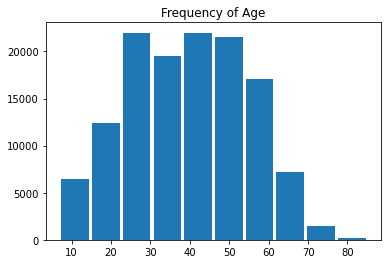

In [5]:
plt.hist(data['Age'],rwidth=0.9)
plt.title('Frequency of Age')
plt.xticks()
plt.yticks()

In [6]:
#Density plot

<AxesSubplot:ylabel='Density'>

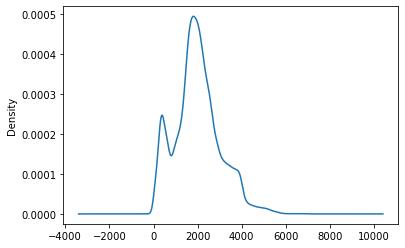

In [7]:
df['Flight Distance'].plot(kind='density')

<AxesSubplot:xlabel='Flight Distance', ylabel='Density'>

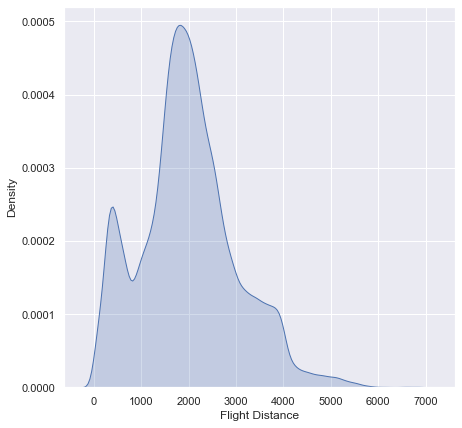

In [8]:
sns.set(rc={'figure.figsize':(7,7)})
sns.kdeplot(df['Flight Distance'],shade=True)

Bivariate descriptive analysis are designed to reveal the relationship between two variables. Such a plot permits you to see at a glance the degree and pattern of relation between two variables.

In [ ]:
#Mosaic plot

(<Figure size 504x504 with 3 Axes>,
 {('Female', 'satisfied'): (0.0, 0.0, 0.50485944162771, 0.6492569243812601),
  ('Female', 'dissatisfied'): (0.0,
   0.6525791835174727,
   0.50485944162771,
   0.3474208164825272),
  ('Male', 'satisfied'): (0.5098345660058194,
   0.0,
   0.4901654339941806,
   0.4386528579575716),
  ('Male', 'dissatisfied'): (0.5098345660058194,
   0.44197511709378423,
   0.4901654339941806,
   0.5580248829062157)})

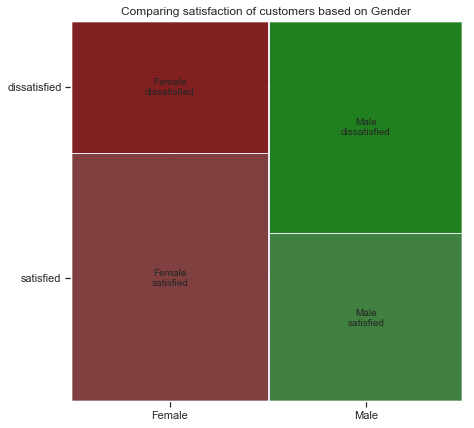

In [10]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(df,['Gender','satisfaction'],title='Comparing satisfaction of customers based on Gender')

# 4.Modelling

This is a classification problem as we are categorizing customers to 'Satisfied' and 'Dissatisfied';ie we are predicting a category here. We would be modeling the data with the help of Logistic Regression.

After  applying  some preprocessing steps to these data ,we are ready for logistic regression. Now we will create a logistic regression model. Let's split our data into two data frames such as train and test by using train_test_split method of sklearn.

In [36]:
X= data.drop(['satisfaction','Customer Type','Type of Travel'], axis = 1)
y= data['satisfaction']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [38]:
#Logistic Regression

In [39]:
log_reg = LogisticRegression()

In [40]:
log_reg.fit(X_train,y_train)
y_pred=log_reg.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [42]:
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision is',precision_score(y_test,y_pred))
print('Recall is',recall_score(y_test,y_pred))
print('f1 score is',f1_score(y_test,y_pred))

Accuracy is 0.7000564623755261
Precision is 0.6783316826235282
Recall is 0.8637085474077534
f1 score is 0.7598775451500893


We did everything to make classifications by using logistic regression. Let's create a logistic regression instance firstly. Then fit it by using the split data. Once our model is ready, call the predict method to make classifications and check some of the results

In [43]:
fit_model = log_reg.fit(X_train, y_train)
preds = fit_model.predict(X_test)
probs = fit_model.predict_proba(X_test)

In [44]:
probs

array([[0.22120257, 0.77879743],
       [0.44940518, 0.55059482],
       [0.44646676, 0.55353324],
       ...,
       [0.69196619, 0.30803381],
       [0.43068693, 0.56931307],
       [0.239654  , 0.760346  ]])

In [45]:
model_results = pd.DataFrame([preds, y_test, [elem[0] for elem in probs], [elem[1] for elem in probs]])
model_results = model_results.T
model_results.rename(columns = {0 : 'PredictedClass', 1 : 'TrueClass', 2 : 'ClassProb:0', 3 : 'ClassProb:1'}, inplace = True)

In [46]:
model_results

,PredictedClass,TrueClass,ClassProb:0,ClassProb:1
0,1.0,1.0,0.221203,0.778797
1,1.0,0.0,0.449405,0.550595
2,1.0,1.0,0.446467,0.553533
3,1.0,1.0,0.234370,0.765630
4,0.0,0.0,0.676174,0.323826
...,...,...,...,...
38959,1.0,0.0,0.456822,0.543178
38960,1.0,1.0,0.230836,0.769164
38961,0.0,0.0,0.691966,0.308034
38962,1.0,0.0,0.430687,0.569313


In [47]:
true_count = 0
for pred, real in zip(model_results['PredictedClass'], model_results['TrueClass']):
    if pred == real:
        true_count = true_count + 1
print("Number of True Classifications = {0} ".format(true_count))
print("Accurate Classification Ratio = {0} ".format(true_count / len(y_test)))

Number of True Classifications = 27277 
Accurate Classification Ratio = 0.7000564623755261 


# 5.Model Fine Tuning

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [49]:
rf.fit(X_train,y_train)
rft=RandomForestClassifier(n_estimators=500,max_depth=10,random_state=42,criterion='entropy')

In [50]:
rft.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=500,
                       random_state=42)

In [51]:
y_preds=rft.predict(X_test)
f1_score(y_test,y_preds)

0.8888938889388894

In [ ]:
After fine tuning of the model,the f1 score obtained is approximately 89%

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('Invistico_Airline.csv')

In [3]:
data['satisfaction'].value_counts()

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64

In [5]:
df=pd.DataFrame(data)

In [6]:
df.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [13]:
df1=pd.DataFrame(data,columns=['satisfaction','Seat comfort'])

In [14]:
df1.groupby(['satisfaction']).sum()

,Seat comfort
satisfaction,
dissatisfied,145062
satisfied,223615


In [16]:
df2=pd.DataFrame(data,columns=['satisfaction','Food and drink'])

In [17]:
df2.groupby(['satisfaction']).sum()

,Food and drink
satisfaction,
dissatisfied,156414
satisfied,214003


# Inferences

Overall , majority of the customers are satisfied with the performance of the airlines. Improvements can be made in the 'Seat and Comfort' and the 'Food and drink' sections to further increase the customer satisfaction.